In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
### Importing Reuquired Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import missingno as msno
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [86]:
data = pd.read_csv("train.csv")
data.shape

(1460, 81)

In [87]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning

(1460, 81)


<AxesSubplot:>

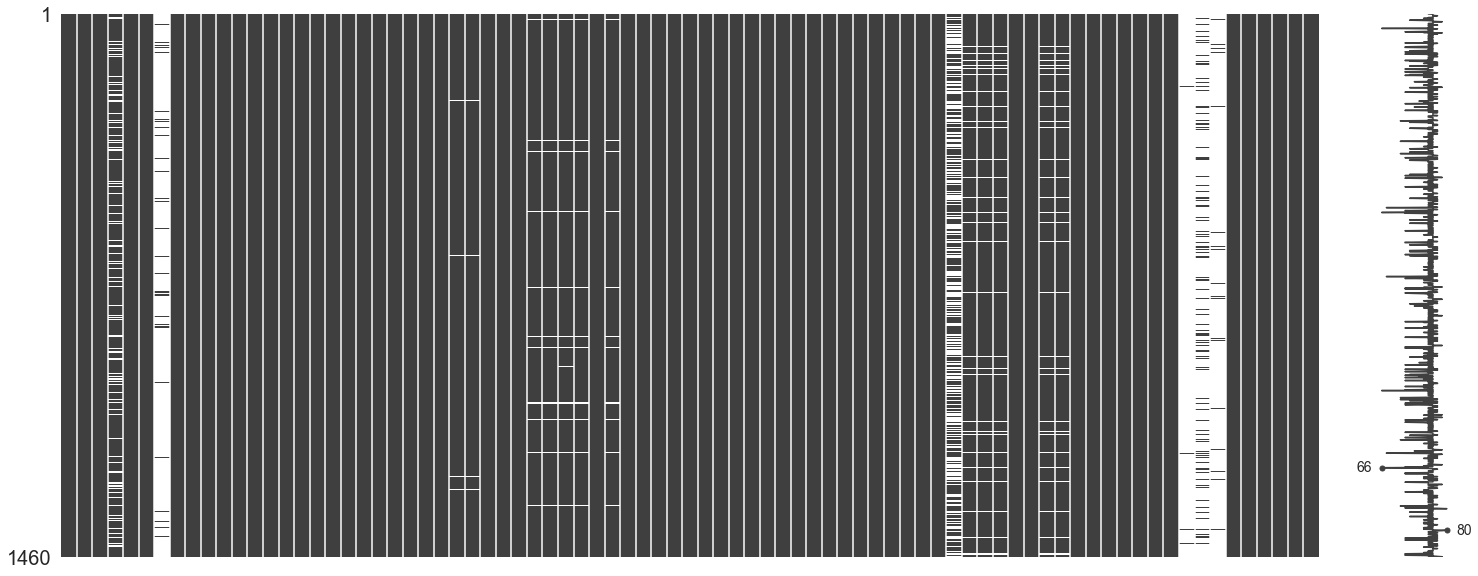

In [88]:
### Checking Null Values in the Columns
print(data.shape)
msno.matrix(data)

In [89]:
### Dropping variables with more than 80% of NULL values
data = data.dropna(thresh=data.shape[0]*0.8,how='all',axis=1)

(1460, 76)


<AxesSubplot:>

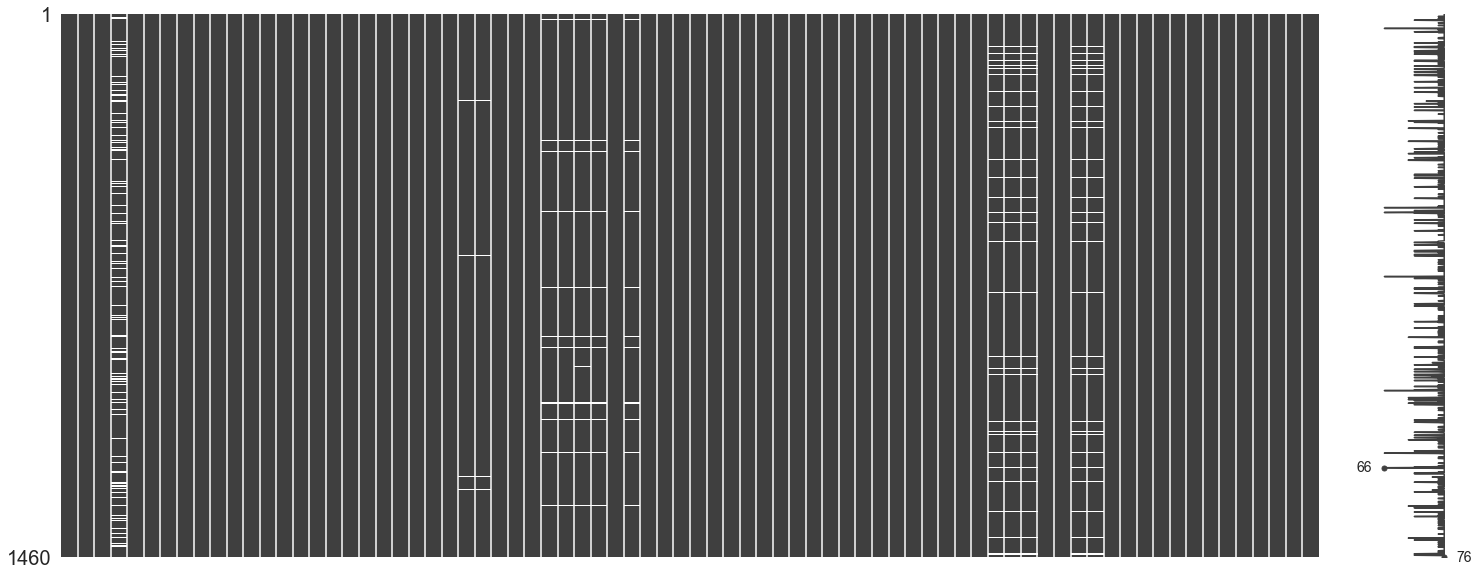

In [90]:
### Comparing the matrix after dropping variables with more than 80% of nulls 
print(data.shape)
msno.matrix(data)

Now if we compare the above 2 diagrams we can see significant difference. around 5 columns have been dropped

In [91]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [92]:
### Masking the Null Values

# -- We have null values in the following columns --
# LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,
# BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish,
# GarageCars, GarageArea, GarageQual, GarageCond,

In [93]:
data[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',]].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,2,548,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,2,460,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,2,608,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,3,642,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,3,836,TA,TA


In [94]:
# lets mask the null values of Numerics by mean/median and for categorical values we will use the mode for masking
# Numeric
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].median())
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].median())
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
# Categorical
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

(1460, 76)


<AxesSubplot:>

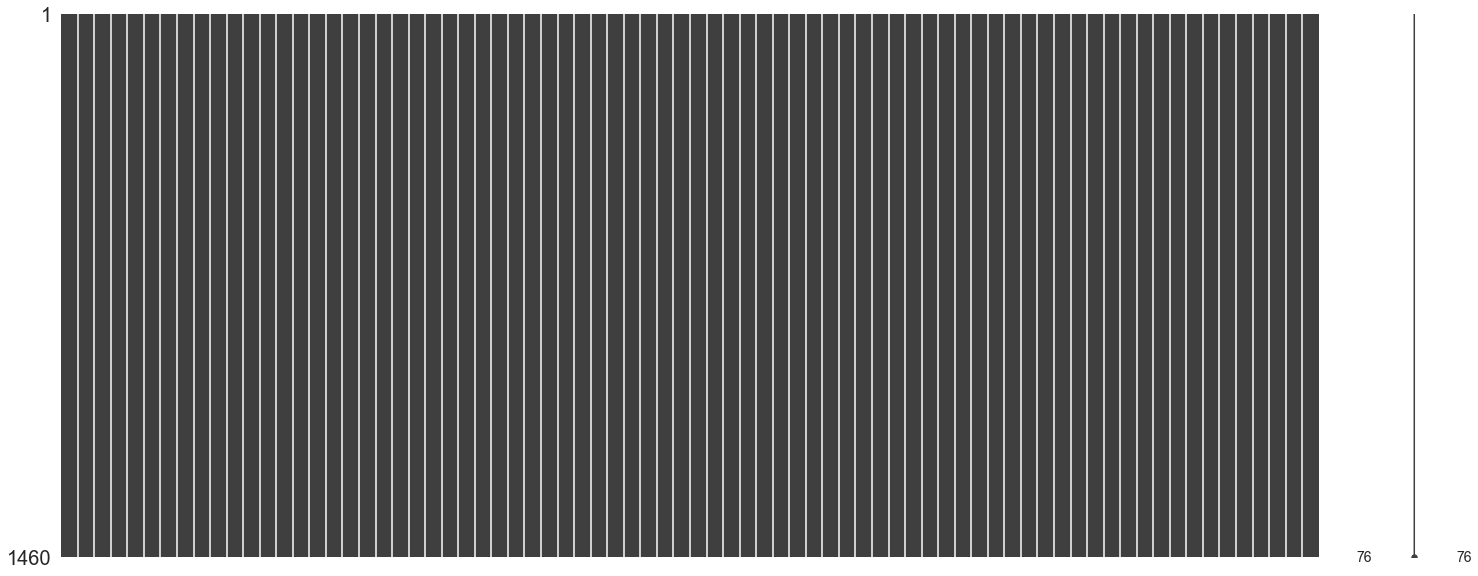

In [95]:
print(data.shape)
msno.matrix(data)

In [96]:
data.drop('Id',axis=1, inplace=True) #dropping as this is a unique value for every row and not needed for model training

In [97]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [98]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [99]:
### Let us look at the data types of the columns and perform a sanity check before moving on to EDA.
# GarageYrBit has to be converted to intergers, it is in float. rest other data types seem to be alright
data['GarageYrBlt'] = data['GarageYrBlt'].astype(int)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [100]:
### We have lot of values in garage type column so let us convert it into a categorical variable - min 1900 max 2010
### let us break it down into old, moderate and new
garage_age = []
for i in data['GarageYrBlt']:
    if i<=1940:
        garage_age.append('old')
    elif i>1940 and i<=1980:
        garage_age.append('moderate')
    else:
        garage_age.append('new')
data['GarageYrBlt'] = garage_age

In [101]:
### for columns YearBuilt, YearRemoAdd and YrSold there are lot of unique values. making their dummies won't be feasible
# let us merge columns YearBuilt and YearRemoAdd(if a house is rennovated we consider that year) and term it as new, moderate and old.
house_year = []
for i, j in zip(data['YearBuilt'],data['YearRemodAdd']):
    if i==j:
        house_year.append(i)
    else:
        house_year.append(j)
data['HouseYear']=house_year
data.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)
data.shape

(1460, 74)

In [102]:
# the year for houses range from 1950 to 2010
print(data.HouseYear.min(),data.HouseYear.max())
house_age = []
for i in data['HouseYear']:
    if i<=1970:
        house_age.append('old')
    elif i>1970 and i<=1990:
        house_age.append('moderate')
    else:
        house_age.append('new')
data['HouseYear'] = house_age

1950 2010


In [103]:
### now that we have an average estimate of the house age in terms of new, moderate and old 
### we can get rid of the sold month and year columns
# data.drop(['YrSold','MoSold'], axis=1, inplace=True)
print(data.shape)
### Final Dataset for EDA and Analysis
data.head()

(1460, 74)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseYear
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,new,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,new
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,moderate,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,moderate
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,new,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,new
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,new,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,old
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,new,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,new


In [104]:
### as we can see above there are no missing values left in the dataset.

In [105]:
## On manual check we found out that columns like Street, Utilities and few more have 95%-99% same class values
# Checking for Cardinality in Independent Data, keeping the threshold at 90%
cat_cols = list(data.select_dtypes(include=['object']))
ordered_cat_cols = ['MSSubClass','OverallQual', 'OverallCond', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
cat_cols.extend(ordered_cat_cols)
cardinality = []
for col in cat_cols:
    if(data[col].value_counts().max() >= data.shape[0]*90/100):
        cardinality.append(col)
cardinality

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'BsmtHalfBath',
 'KitchenAbvGr']

In [106]:
# as we see the cardinality in the above columns is high, so we get rid of these columns to avoid noise in the training data.
if cardinality[0] in data.columns:
    data = data.drop(cardinality, axis=1)
print('remaining shape of the data' ,data.shape)
data.head()

remaining shape of the data (1460, 59)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseYear
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,Attchd,new,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,new
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,Attchd,moderate,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,moderate
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,Attchd,new,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,new
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Detchd,new,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,old
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,Attchd,new,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,new


In [107]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [108]:
numeric_cols = [i for i in data.columns if i not in cat_cols]
numeric_cols.remove('SalePrice')

Skewed Numericals:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


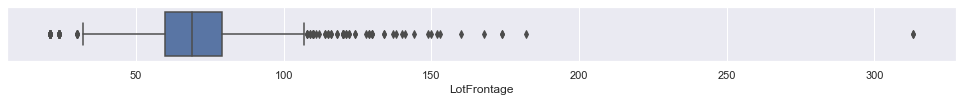

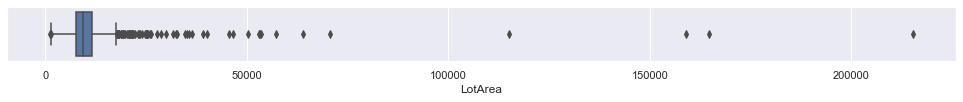

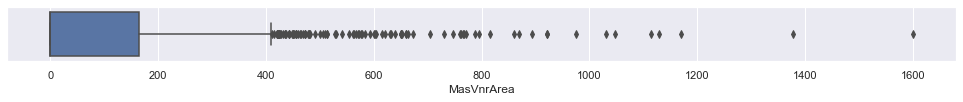

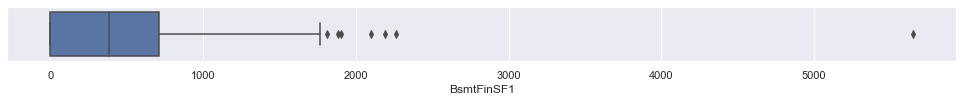

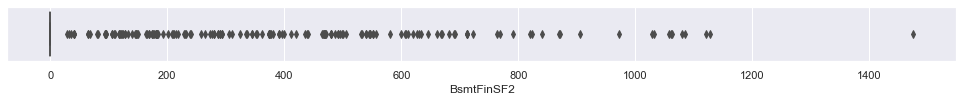

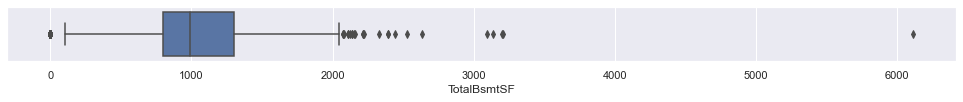

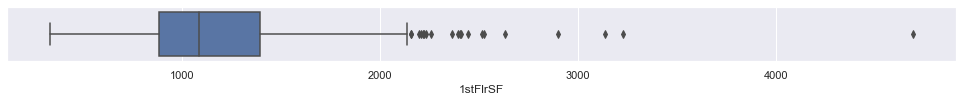

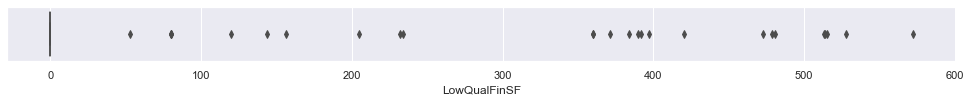

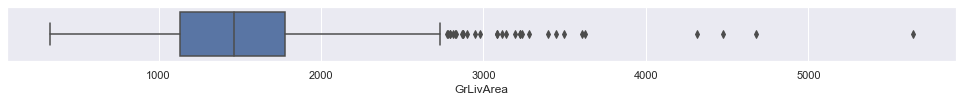

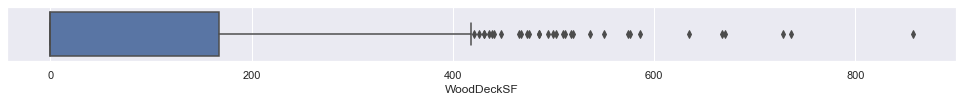

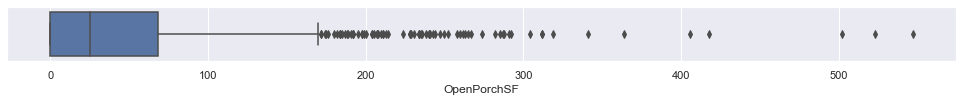

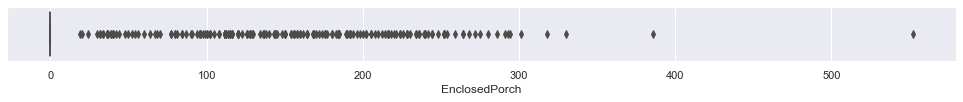

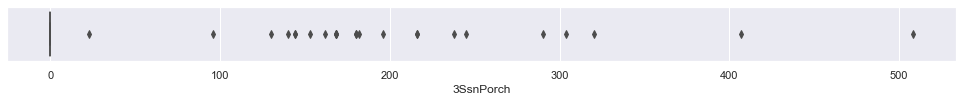

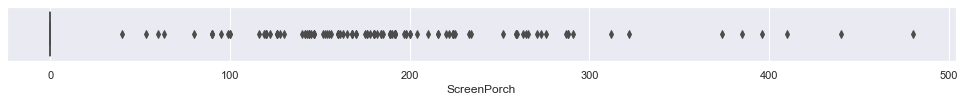

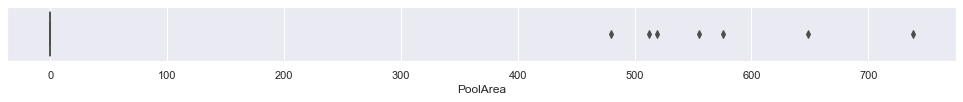

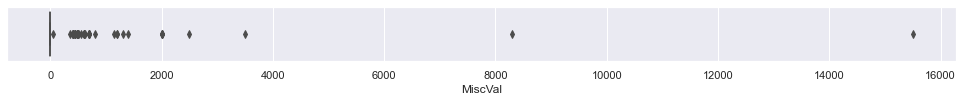

In [109]:
### handling outliers
### let us check for distributions of our numerical variables
# Outlier handling
def outliers(data, column):
    # Computing 5th, 95th percentiles and replacing the outliers
    fifth_percentile = np.percentile(data[column], 5)
    nintyfifth_percentile = np.percentile(data[column], 95)
    b = np.where( data[column]>nintyfifth_percentile, nintyfifth_percentile, data[column])
    b = np.where(b<fifth_percentile, fifth_percentile, b)
    return b
### Identifiying columns with high skew - we can use skew measure to check if there are outliers in our variables or not
skewed_cols=[]
for i in numeric_cols:
    skew = data[i].skew()
    if skew<-1 or skew>1:
        skewed_cols.append(i)
print('Skewed Numericals: ',skewed_cols)
### Distribution of Skewed Cols
for column in skewed_cols:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=data, x=data[column])
### Handling outliers
for i in skewed_cols:
    data[i]=outliers(data, i)

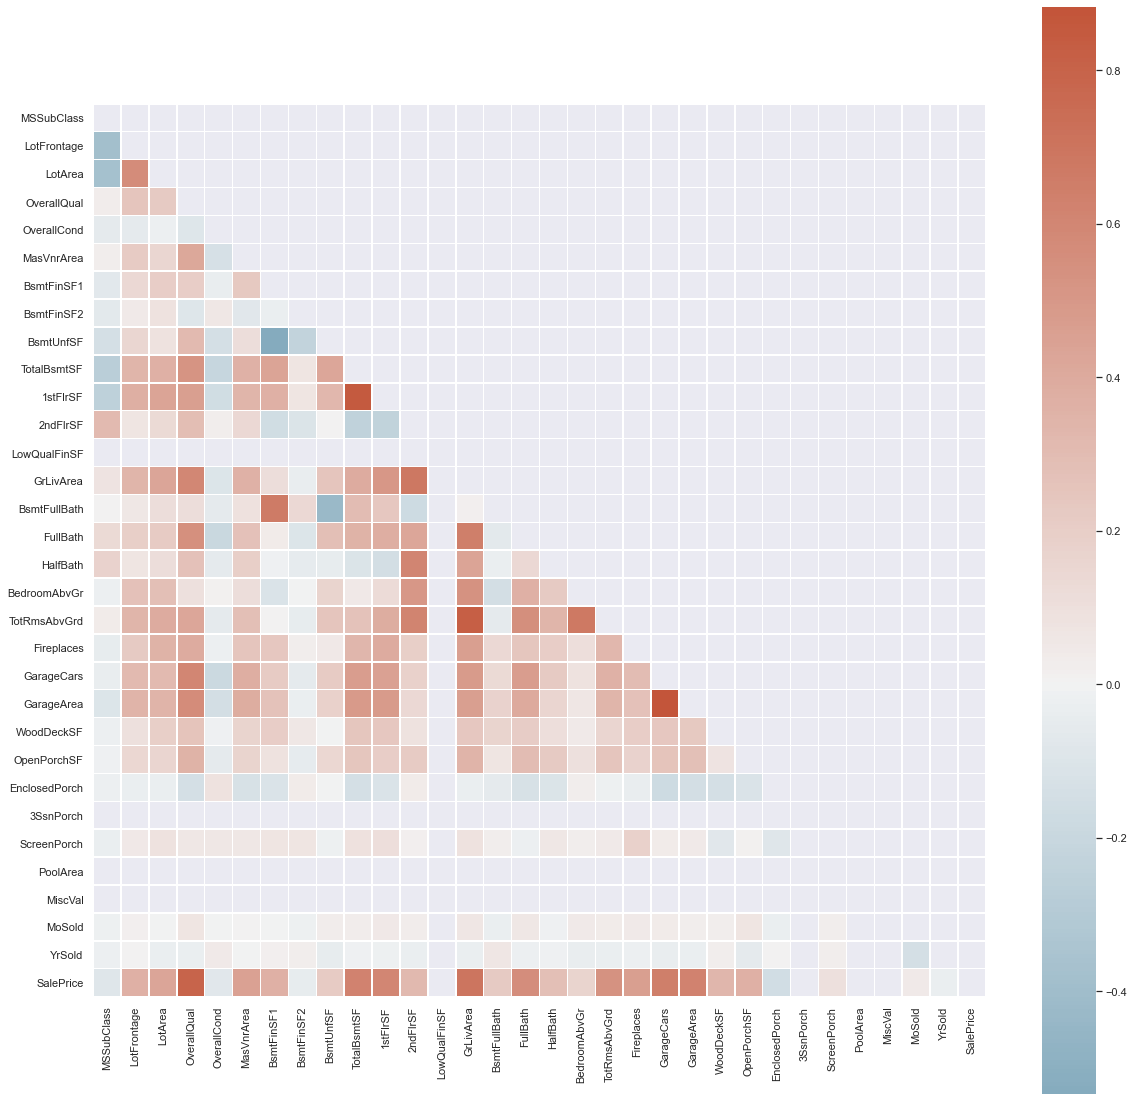

In [110]:
# let us look at the correation matrix of the data
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5)
f.show()

As we see there are many independent variables with high multicollinearity. we can get rid of these high multi-collinear variables using RFE, which we will implement later in this notebook

In [111]:
### Checking the Skew of the data again
data[numeric_cols].skew()

LotFrontage      0.111058
LotArea          0.312270
MasVnrArea       1.395183
BsmtFinSF1       0.541477
BsmtFinSF2       3.001998
BsmtUnfSF        0.920268
TotalBsmtSF      0.462345
1stFlrSF         0.507677
2ndFlrSF         0.813030
LowQualFinSF     0.000000
GrLivArea        0.472835
GarageArea       0.179981
WoodDeckSF       0.865745
OpenPorchSF      1.169155
EnclosedPorch    2.461382
3SsnPorch        0.000000
ScreenPorch      3.250181
PoolArea         0.000000
MiscVal          0.000000
dtype: float64

In [112]:
print('final_train_data :', data.shape)
data.head()

final_train_data : (1460, 59)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseYear
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706.0,Unf,0.0,150,856.0,Ex,856.0,854,0.0,1710.0,1,2,1,3,Gd,8,0,Attchd,new,RFn,2,548,0.0,61.0,0.00,0.0,0.0,0.0,0.0,2,2008,WD,Normal,208500,new
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978.0,Unf,0.0,284,1262.0,Ex,1262.0,0,0.0,1262.0,0,2,0,3,TA,6,1,Attchd,moderate,RFn,2,460,298.0,0.0,0.00,0.0,0.0,0.0,0.0,5,2007,WD,Normal,181500,moderate
2,60,RL,68.0,11250.0,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486.0,Unf,0.0,434,920.0,Ex,920.0,866,0.0,1786.0,1,2,1,3,Gd,6,1,Attchd,new,RFn,2,608,0.0,42.0,0.00,0.0,0.0,0.0,0.0,9,2008,WD,Normal,223500,new
3,70,RL,60.0,9550.0,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216.0,Unf,0.0,540,756.0,Gd,961.0,756,0.0,1717.0,1,1,0,3,Gd,7,1,Detchd,new,Unf,3,642,0.0,35.0,180.15,0.0,0.0,0.0,0.0,2,2006,WD,Abnorml,140000,old
4,60,RL,84.0,14260.0,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655.0,Unf,0.0,490,1145.0,Ex,1145.0,1053,0.0,2198.0,1,2,1,4,Gd,9,1,Attchd,new,RFn,3,836,192.0,84.0,0.00,0.0,0.0,0.0,0.0,12,2008,WD,Normal,250000,new


## EDA

In [113]:
data.shape

(1460, 59)

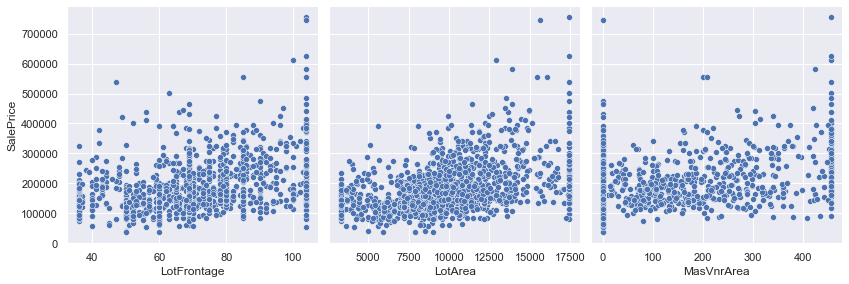

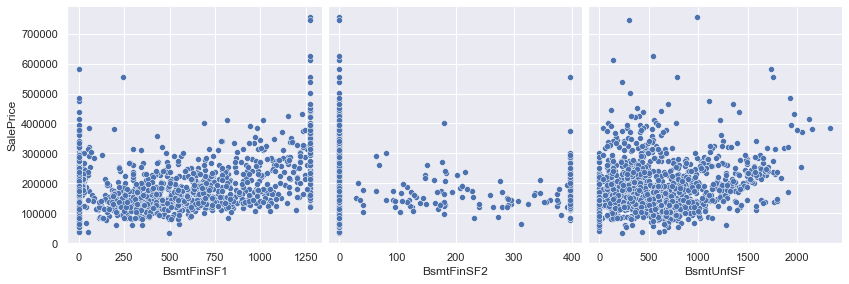

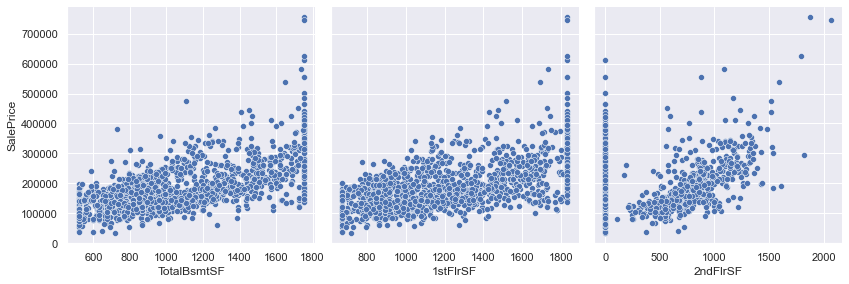

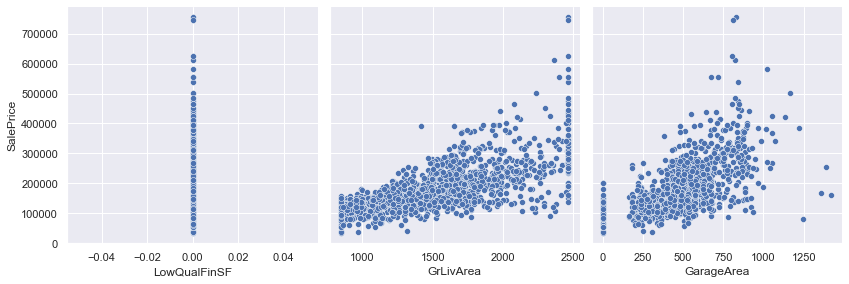

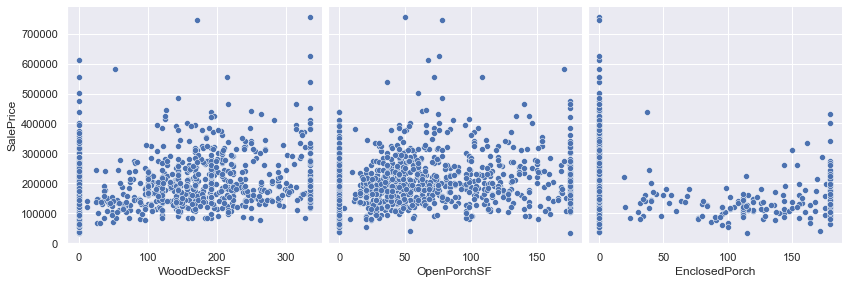

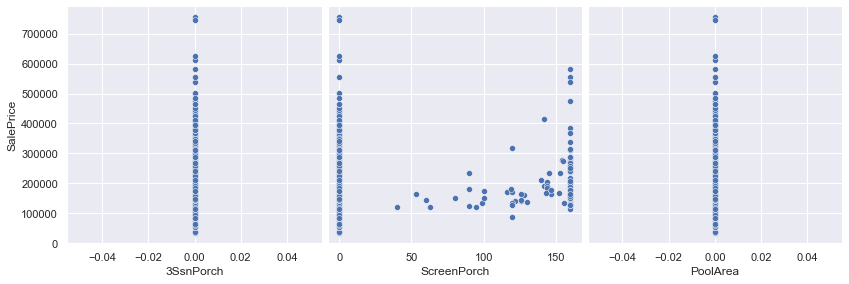

In [114]:
### Comapring SalePrice with various other variables to check the trend
for i in range(0, 18, 3):
    sns.pairplot(data, x_vars=numeric_cols[i:i+3], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
    plt.show()

Above, we see there are many numeric columns displaying linear relation with pur target variable. although there are some which so not show any linearity at all. these columns would be handled in feature selection.

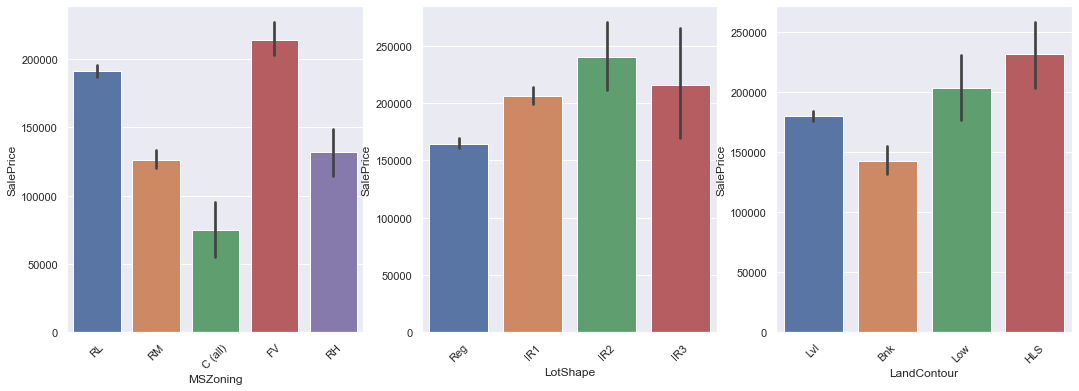

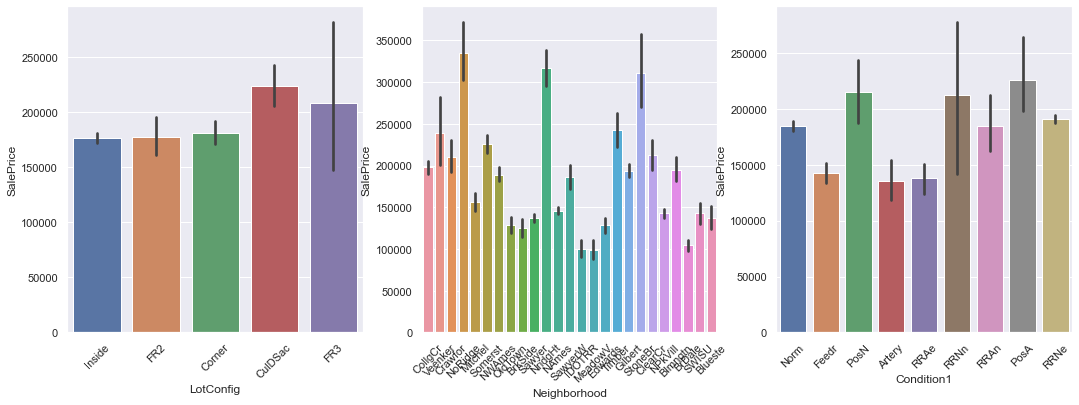

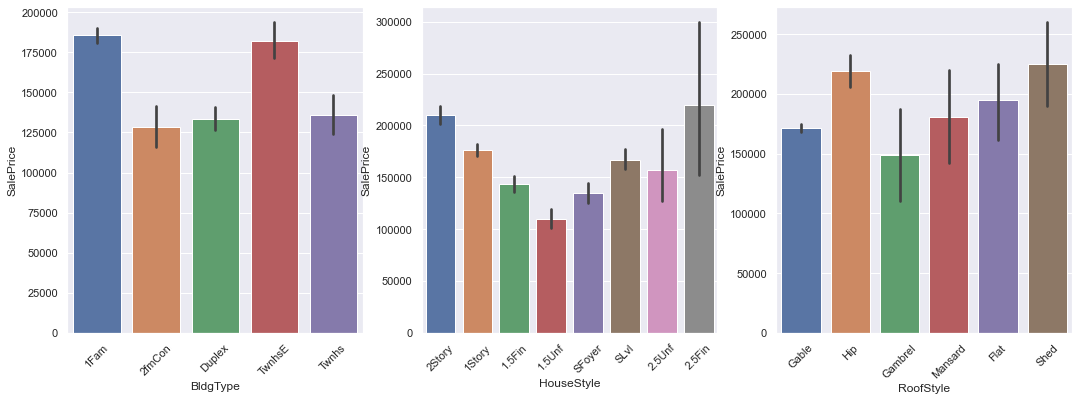

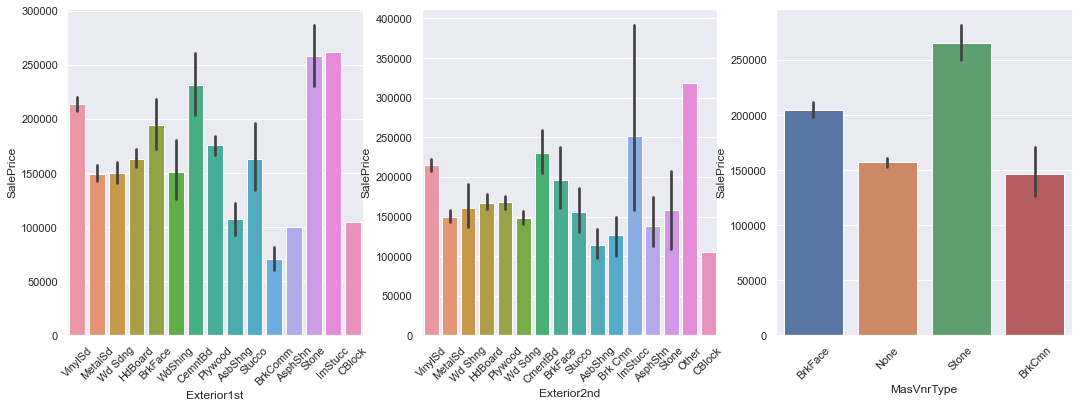

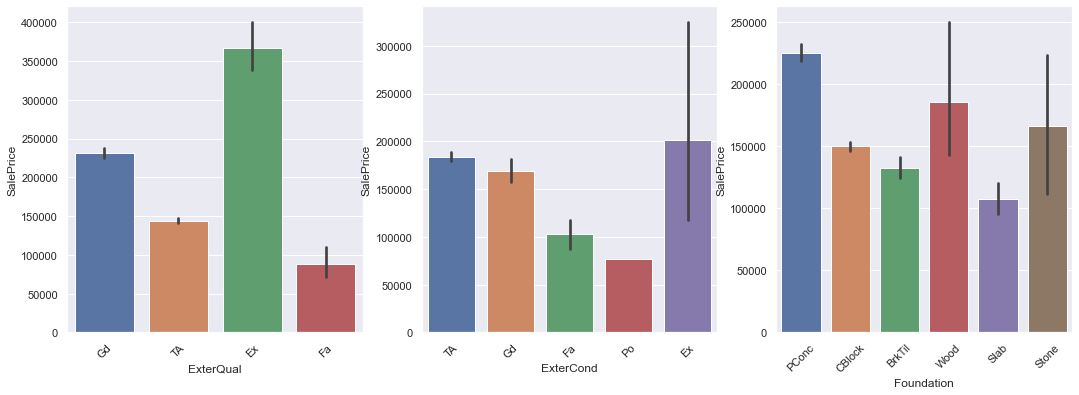

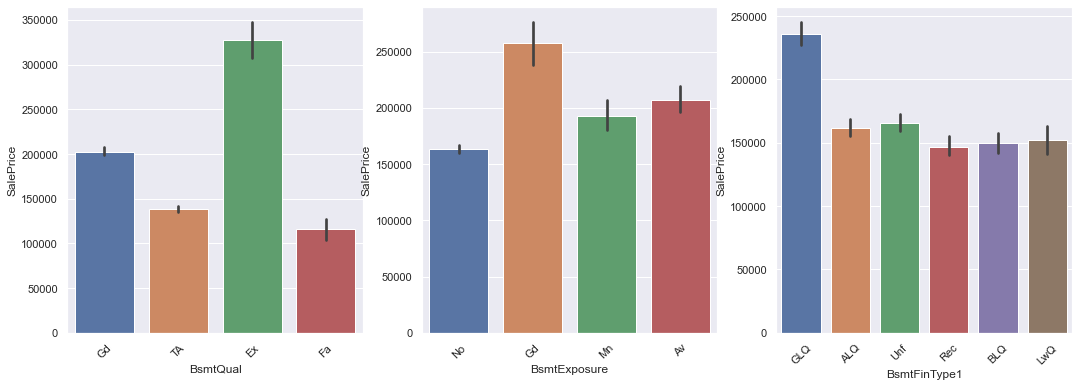

In [115]:
obj_cat_cols = list(data.select_dtypes(include=['object']))
for i in range(0, 18, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
    sns.barplot(x=obj_cat_cols[i], y="SalePrice", data=data, ax=ax1)
    sns.barplot(x=obj_cat_cols[i+1], y="SalePrice", data=data, ax=ax2)
    sns.barplot(x=obj_cat_cols[i+2], y="SalePrice", data=data, ax=ax3)
    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    ax3.tick_params(axis='x', rotation=45)
    fig.show()

Above, our price variable is checked against some of the categorical variables. this is too check for cardinalities in the variables and also to check how sale price is distributed accross each category.

## Data Prep

In [116]:
### Creating Dummy Variables
obj_cat_cols = list(data.select_dtypes(include=['object']))
# dummies = pd.get_dummies(data[obj_cat_cols], drop_first=True)
cat_cols_ = [i for i in data.columns if i in cat_cols]
data[cat_cols_] = data[cat_cols_].astype(str)
dummies = pd.get_dummies(data[cat_cols_], drop_first=True)
### dropping columns which are converted into dummies
# data.drop(columns=obj_cat_cols, inplace=True, axis=1)
data.drop(columns=cat_cols_, inplace=True, axis=1)
### Combining the dummies
data.reset_index(inplace=True, drop=True)
dummies.reset_index(inplace=True, drop=True)
data = pd.concat([data, dummies], axis=1)
data.shape

(1460, 252)

In [117]:
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt_new,GarageYrBlt_old,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseYear_new,HouseYear_old
0,65.0,8450.0,196.0,706.0,0.0,150,856.0,856.0,854,0.0,1710.0,548,0.0,61.0,0.00,0.0,0.0,0.0,0.

## Feature Selection

In [118]:
### For Feature Selection we are using RFE-Cross-Validation (RFECV) technique here.
### RFECV will help us get the right number of columns required for modelling

In [119]:
### Train test Split
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [120]:
print(X_train.shape)
X_train.head()

(1168, 251)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt_new,GarageYrBlt_old,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseYear_new,HouseYear_old
609,61.0,7943.0,192.0,903.0,0.0,126,1029.0,1029.0,0,0.0,1029.0,261,64.0,0.0,39.0,0.0,0.0,0.0,0.0,0,0,0,

In [121]:
scaler = MinMaxScaler()
X_cols = X_train.columns
scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [122]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageYrBlt_new,GarageYrBlt_old,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseYear_new,HouseYear_old
609,0.368112,0.328707,0.421053,0.708791,0.0,0.053938,0.413147,0.307390,0.000000,0.0,0.111860,0.184062,0

In [123]:
### Applying RFECV
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfecv = RFECV(estimator=LinearRegression(), 
              step=1, 
              cv=StratifiedKFold(18),
              scoring='r2')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=18, random_state=None, shuffle=False),
      estimator=LinearRegression(), scoring='r2')

In [124]:
rfecv.n_features_

54

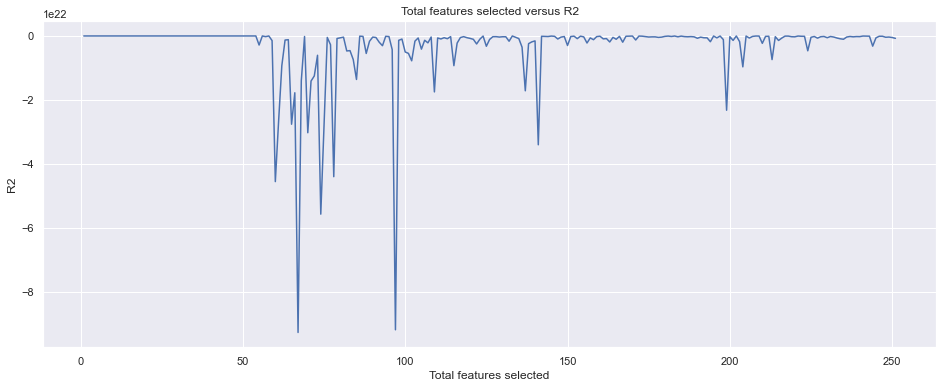

In [125]:
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus R2')
plt.xlabel('Total features selected')
plt.ylabel('R2')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

This chart depicts how our R2 value will fluctuate as we increase or decrease the number of features selected.

In [126]:
X_train = X_train[X_train.columns[rfecv.support_]]
X_test = X_test[X_test.columns[rfecv.support_]]

In [127]:
X_train.shape

(1168, 54)

now that we know the optimal number of variables to keep is 54, we can go ahead and start creating models

## Modeling

In [128]:
# method for cheking LR assumptions
def assumptions(model, X_train, X_test, y_train, y_test):
    # 1. checking if the residual mean is 0
    y_pred = model.predict(X_train)
    residuals = y_train.values - y_pred
    print("Residual Mean Error is:",round(residuals.mean(),3))
    # 2. check for homoscedasticity
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,6))
    sns.scatterplot(y_pred,residuals, ax=ax1)
    ax1.set_xlabel("Residuals")
    ax1.set_ylabel("Predictions")
    ax1.set_title("Homoscedasticity Check")
#     sns.lineplot([0,3],[0,0],color='red', ax=ax1)
    # 3. check for normality of error terms/residuals
    sns.distplot(residuals, ax=ax2)
    ax2.set_xlabel("Residuals")
    ax2.set_title("Normality of Error Terms Check")
#     # 4. check for multi collinearity
#     cmap = sns.diverging_palette(230, 20, as_cmap=True)
#     sns.heatmap(X_train.corr(), cmap=cmap, ax=ax3)
#     ax3.set_title("Multi-Collinearity Check")

## Simple Linear Regression

In [129]:
def lin_reg(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
    print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
    sns.regplot(y_test,y_pred_test)
    return model

R2 Score of the training data: 0.8777021111654487
R2 Score of the testing data: 0.8005044219563955
Residual Mean Error is: 0.0


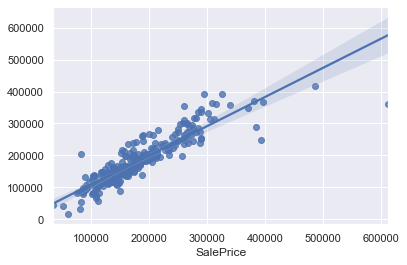

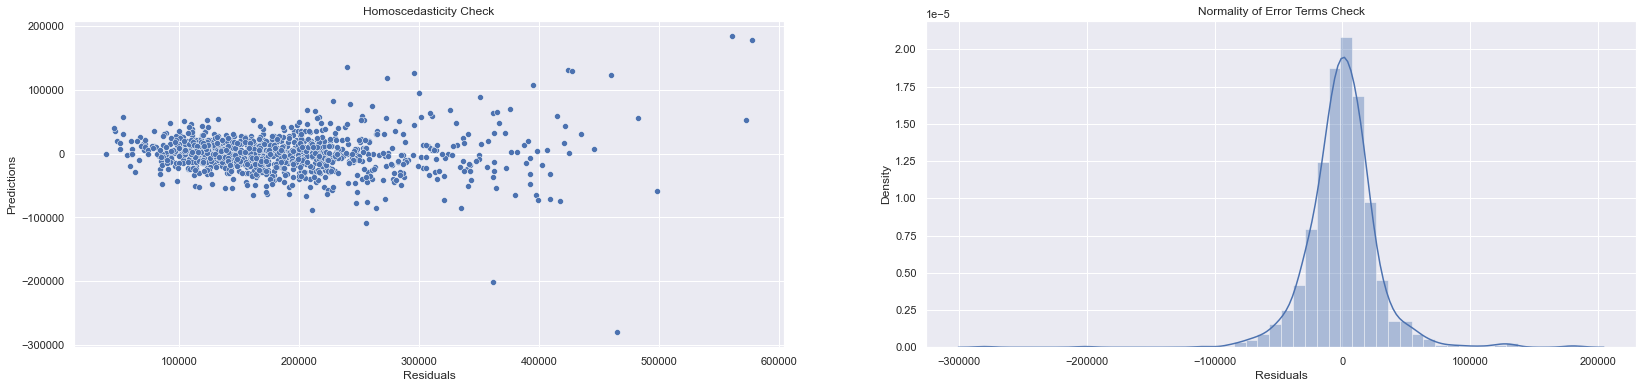

In [130]:
model1 = lin_reg(X_train, y_train, X_test, y_test)
assumptions(model1, X_train, X_test, y_train, y_test)

we see that the R2 on our testing data is coming out to be 87% but r2 score on our test set is too less compared to train set. also when we look at the residual spread the variance doesnot seem to be constant.

## LR with target variable transformation

R2 Score of the training data: 0.8817387308477458
R2 Score of the testing data: 0.83899552463785
Residual Mean Error is: 0.0


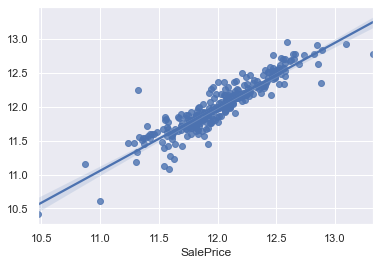

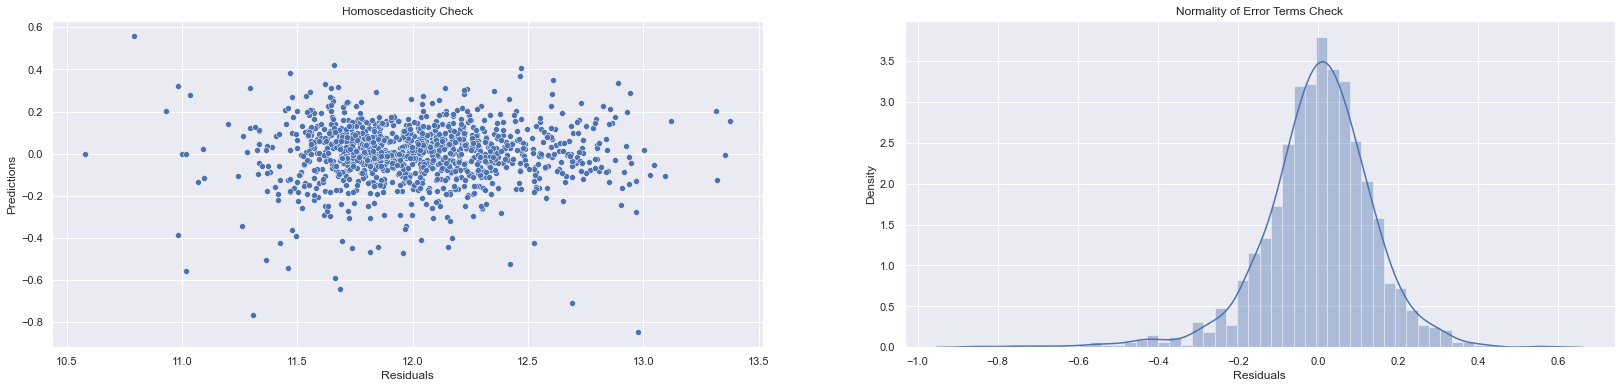

In [131]:
### Transforming the Y variable for better results
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
model2 = lin_reg(X_train, y_train_log, X_test, y_test_log)
assumptions(model2, X_train, X_test, y_train_log, y_test_log)

Our model seem to be more generalised now than before. the distributions of residuals have also been corrected. now, let us use regularization techniques and observe the results we get

## Ridge

Fitting 5 folds for each of 12 candidates, totalling 60 fits
ridge_model_cv_alpha Ridge(alpha=1)
R2 Score of the training data: 0.8770463231488708
R2 Score of the testing data: 0.8511381569087493
Residual Mean Error is: 0.0


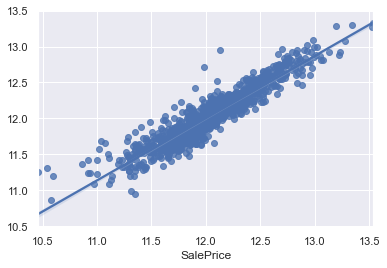

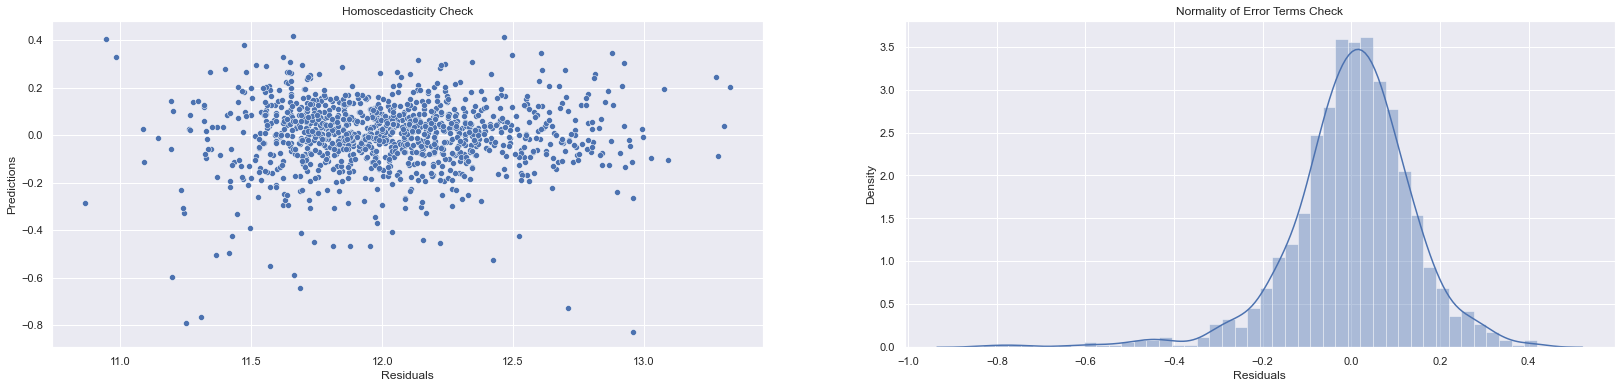

In [132]:
### Using Ridge Regularization, we are selecting the right alpha value by using gridsearchcv
rdg = Ridge()
params = {'alpha': [0.1, 0.001, 1, 1.5, 2, 3, 4, 5, 10, 100, 500, 1000]}
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = rdg,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train_log)
print('ridge_model_cv_alpha',ridge_model_cv.best_estimator_)
rdg = Ridge(alpha = ridge_model_cv.best_estimator_.alpha) # alpha here is the regularization strength. please do not confuse this with learning rate

rdg.fit(X_train, y_train_log)
y_pred_train = rdg.predict(X_train)
y_pred_test = rdg.predict(X_test)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train_log))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test_log))
sns.regplot(y_train_log,y_pred_train)
assumptions(rdg, X_train, X_test, y_train_log, y_test_log)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
ridge_model_cv_alpha 2
R2 Score of the training data: 0.8737273514905264
R2 Score of the testing data: 0.8491180383763313
Residual Mean Error is: 0.0


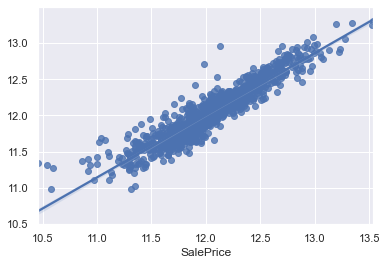

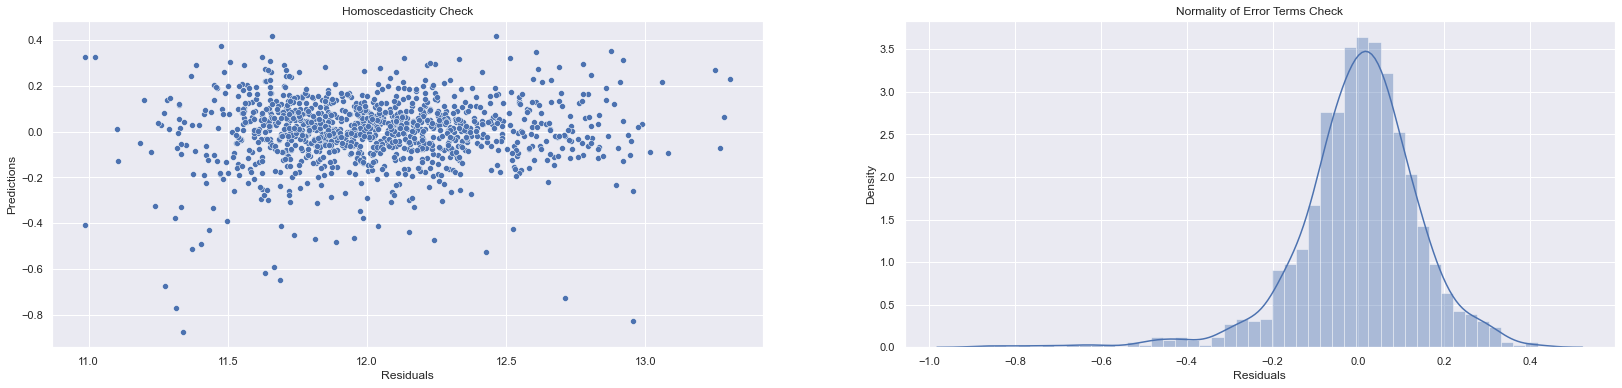

In [133]:
### Ridge with Double the Value
### This is performed to asnwer the questions in the written assignment
ridge_model_cv.fit(X_train, y_train_log)
print('ridge_model_cv_alpha',2)
rdg = Ridge(alpha = 2) # alpha here is the regularization strength. please do not confuse this with learning rate

rdg.fit(X_train, y_train_log)
y_pred_train = rdg.predict(X_train)
y_pred_test = rdg.predict(X_test)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train_log))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test_log))
sns.regplot(y_train_log,y_pred_train)
assumptions(rdg, X_train, X_test, y_train_log, y_test_log)

Our model seem to be more generalised now, we have . the distributions of residuals have also been corrected. now, let us use regularization techniques and observe the results we get

## Lasso

Fitting 5 folds for each of 11 candidates, totalling 55 fits
0.001
                Features  Coefficient
0                LotArea       0.1210
1             BsmtFinSF1       0.1701
2               1stFlrSF       0.4063
3               2ndFlrSF       0.4409
4          MSSubClass_90      -0.0848
5            MSZoning_FV       0.2217
6            MSZoning_RH       0.0096
7            MSZoning_RL       0.1269
8   Neighborhood_Edwards      -0.0900
9   Neighborhood_NoRidge       0.0642
10  Neighborhood_NridgHt       0.1157
11  Neighborhood_StoneBr       0.0876
12       BldgType_Duplex      -0.0276
13        OverallQual_10       0.2074
14         OverallQual_3      -0.2750
15         OverallQual_4      -0.1862
16         OverallQual_5      -0.0995
17         OverallQual_7       0.1132
18         OverallQual_8       0.2043
19         OverallQual_9       0.2810
20         OverallCond_3      -0.2299
21         OverallCond_4      -0.1101
22         OverallCond_7       0.0452
23         OverallCon

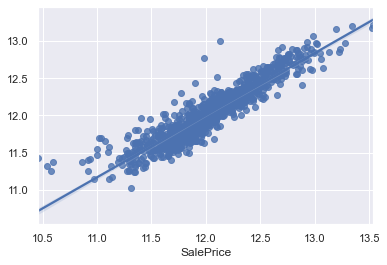

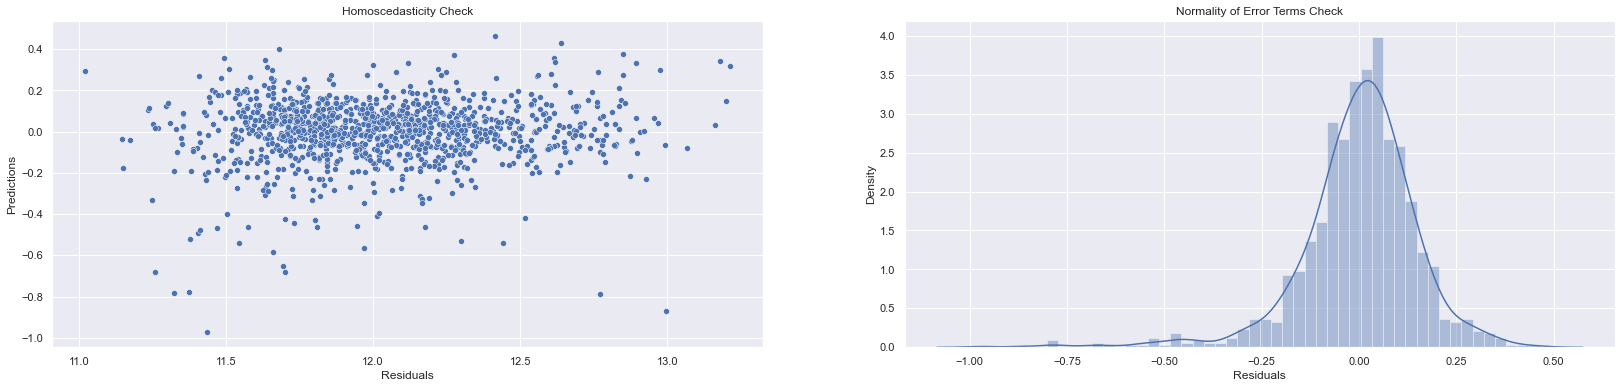

In [134]:
### Using Lasso Regularization, we are selecting the right alpha value by using gridsearchcv (Transformed Y variable)
lasso = Lasso()
params = {'alpha': [0.1, 0.001, 1, 2, 3, 4, 5, 10, 100, 500, 1000]}
# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train_log)
alpha = lasso_model_cv.best_estimator_.alpha
print(alpha)
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train_log) 
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
print(lasso_df)
### Lasso Features
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]
### Predicitions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
sns.regplot(y_train_log, y_pred_train)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train_log))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test_log))
assumptions(lasso, X_train, X_test, y_train_log, y_test_log)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
alpha 100
                Features  Coefficient
0                LotArea   23150.5659
1             BsmtFinSF1   29217.9626
2               1stFlrSF   78733.7584
3               2ndFlrSF   94100.9222
4          MSSubClass_90  -19798.8723
5            MSZoning_FV   28682.4750
6            MSZoning_RL    7870.5964
7            MSZoning_RM   -6376.6229
8   Neighborhood_Edwards  -17243.8387
9   Neighborhood_NoRidge   47386.7439
10  Neighborhood_NridgHt   32518.1077
11  Neighborhood_StoneBr   40291.9295
12       BldgType_Duplex   -3396.7579
13        OverallQual_10  116199.2112
14         OverallQual_3  -17642.5875
15         OverallQual_4  -16029.0690
16         OverallQual_5  -13321.5496
17         OverallQual_7   19445.1102
18         OverallQual_8   43893.3556
19         OverallQual_9   87757.3208
20         OverallCond_2   -2359.3073
21         OverallCond_3  -25025.0842
22         OverallCond_4  -20094.3339
23         Overal

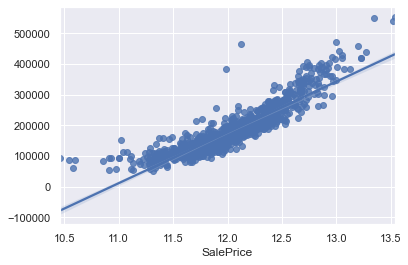

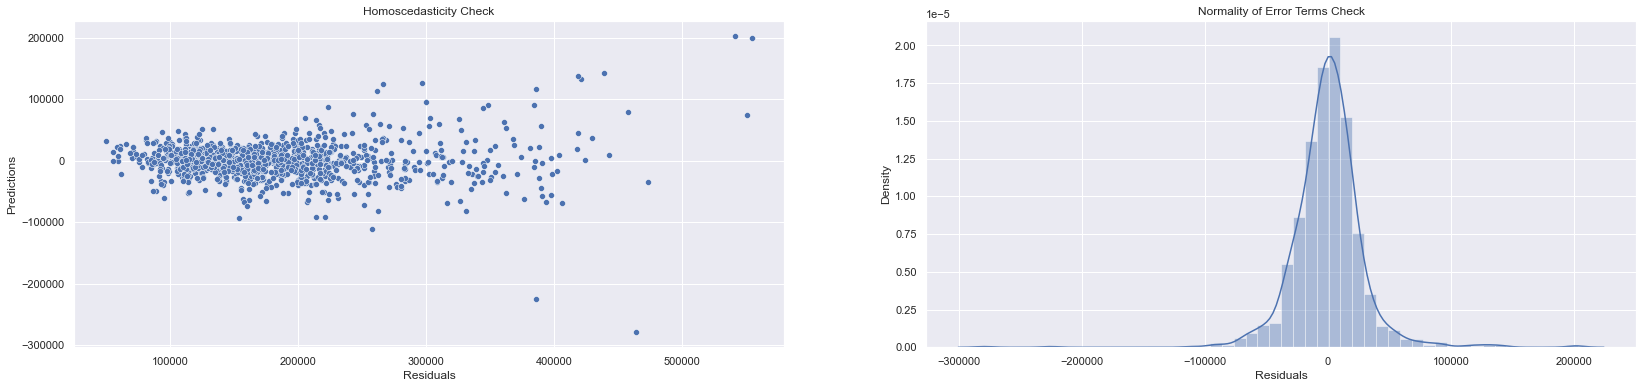

In [135]:
### Lasso without transformed target variable
### This is performed to asnwer the questions in the written assignment (alpha is 100 here)
lasso = Lasso()
params = {'alpha': [0.1, 0.001, 1, 2, 3, 4, 5, 10, 100,200,300,400, 500, 1000]}
# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)
alpha = lasso_model_cv.best_estimator_.alpha
print('alpha',alpha)
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
print(lasso_df)
### Lasso Features
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]
### Predicitions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
sns.regplot(y_train_log, y_pred_train)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
assumptions(lasso, X_train, X_test, y_train, y_test)

                Features  Coefficient
0                LotArea   23190.0675
1             BsmtFinSF1   29578.9720
2               1stFlrSF   76781.7742
3               2ndFlrSF   90900.0866
4          MSSubClass_90  -17123.9209
5            MSZoning_FV   21184.9449
6            MSZoning_RL    3020.2798
7            MSZoning_RM  -10719.0288
8   Neighborhood_Edwards  -16154.2062
9   Neighborhood_NoRidge   44699.8943
10  Neighborhood_NridgHt   31162.2552
11  Neighborhood_StoneBr   35620.2324
12       BldgType_Duplex   -5094.5924
13        OverallQual_10  111690.6087
14         OverallQual_3  -15123.2346
15         OverallQual_4  -16413.9222
16         OverallQual_5  -13582.4039
17         OverallQual_7   19073.5706
18         OverallQual_8   43468.4626
19         OverallQual_9   83858.8520
20         OverallCond_3  -19959.4499
21         OverallCond_4  -19579.1535
22         OverallCond_7    6059.5369
23         OverallCond_8    3257.1002
24         OverallCond_9    2299.4216
25       Bsm

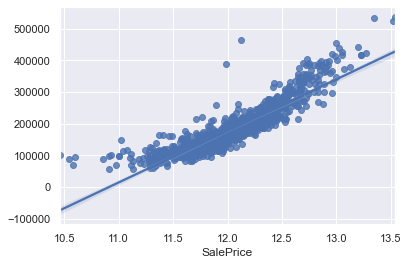

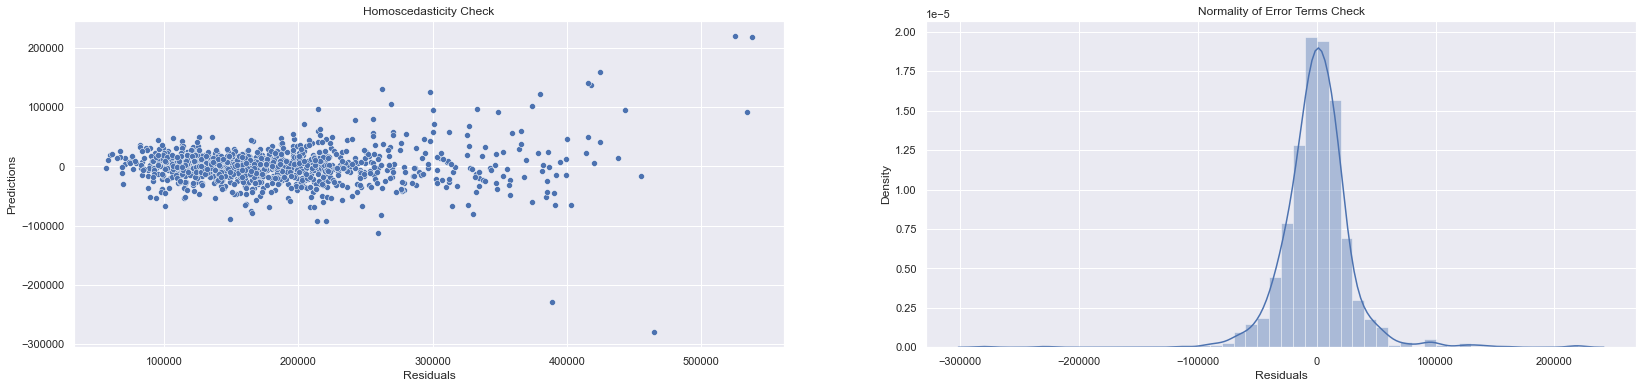

In [136]:
### Lasso with double the value of alpha we got in 
### Lasso without transformed target variable
### This is performed to asnwer the questions in the written assignment (alpha is 200 here)
lasso = Lasso(alpha=200)
        
lasso.fit(X_train, y_train) 
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
print(lasso_df)
### Lasso Features
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]
### Predicitions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
sns.regplot(y_train_log, y_pred_train)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
assumptions(lasso, X_train, X_test, y_train, y_test)

R2 Score of the training data: 0.8701526017200429
R2 Score of the testing data: 0.8231812328590055
Residual Mean Error is: -0.0

TOP 5 Features


,Features,Coefficient
13,OverallQual_10,116199.2112
3,2ndFlrSF,94100.9222
19,OverallQual_9,87757.3208
2,1stFlrSF,78733.7584
9,Neighborhood_NoRidge,47386.7439


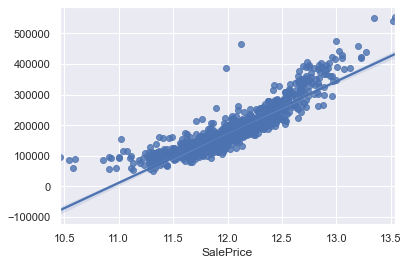

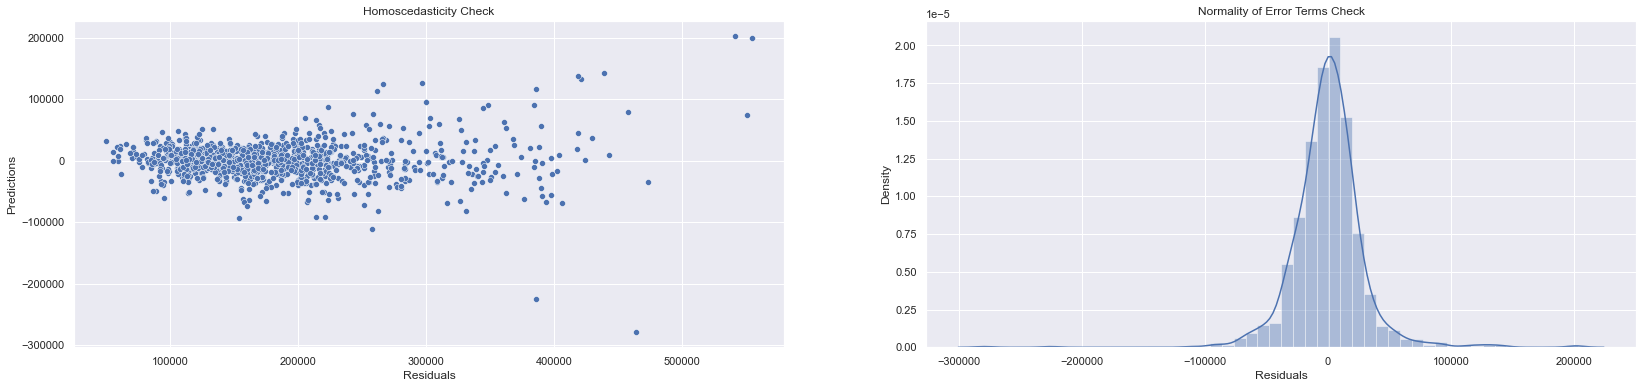

In [137]:
### This is done to answer the 3rd question of written assignment:
# top predictors of lasso regression with optimal value of alpha as 100
lasso = Lasso(alpha=100)
        
lasso.fit(X_train, y_train) 
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
### Lasso Features
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
X_train_lasso = X_train[lasso_df.Features]
### Predicitions
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
sns.regplot(y_train_log, y_pred_train)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
assumptions(lasso, X_train, X_test, y_train, y_test)
print()
print('TOP 5 Features')
lasso_df.sort_values(by = 'Coefficient', ascending=False).head(5)

R2 Score of the training data: 0.8067393295826615
R2 Score of the testing data: 0.7626234010404764
Residual Mean Error is: 0.0

TOP 5 Features


,Features,Coefficient
0,LotArea,58804.0270
34,GarageCars_3,45059.5392
1,BsmtFinSF1,39678.0683
9,Neighborhood_StoneBr,38186.0986
8,Neighborhood_NridgHt,28539.4531


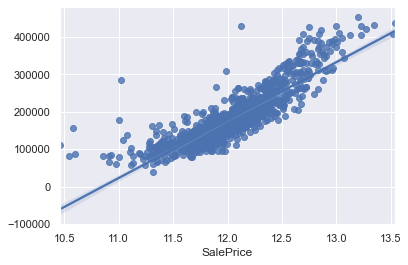

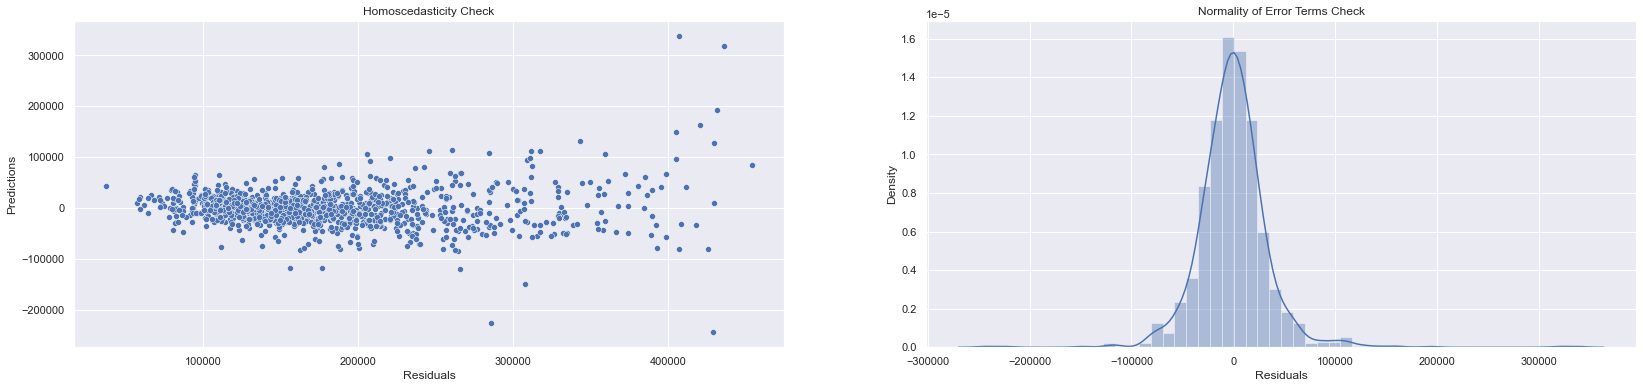

In [138]:
### This is done to answer the 3rd question of written assignment:
# top predictors of lasso regression with optimal value of alpha as 100
lasso_x_train = X_train.drop(['OverallQual_10','2ndFlrSF','OverallQual_9','1stFlrSF','Neighborhood_NoRidge'], axis=1)
lasso_x_test = X_test.drop(['OverallQual_10','2ndFlrSF','OverallQual_9','1stFlrSF','Neighborhood_NoRidge'], axis=1)
lasso = Lasso(alpha=100)
        
lasso.fit(lasso_x_train, y_train) 
lasso_df = pd.DataFrame({'Features':lasso_x_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
### Lasso Features
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = lasso_x_train.columns))
X_train_lasso = lasso_x_train[lasso_df.Features]
### Predicitions
y_pred_train = lasso.predict(lasso_x_train)
y_pred_test = lasso.predict(lasso_x_test)
sns.regplot(y_train_log, y_pred_train)
print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
assumptions(lasso, lasso_x_train, lasso_x_test, y_train, y_test)
print()
print('TOP 5 Features')
lasso_df.sort_values(by = 'Coefficient', ascending=False).head(5)

### Conclusion


After comparing all the R2 values for different models we conclude that after applying regularization techniques our model has been generalised on the test set. Regularization that worked best for us was Ridge Regularization with training R<sup>2</sup> of 87% and test R<sup>2</sup> of 85%. compared to this our Lasso Scores for training R<sup>2</sup> was 86% and test R<sup>2</sup> was 84%
